# Pandas

# Seaborn - high level statistical plotting

In [ ]:
# libraries and data
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
fig = plt.figure(figsize=(10,5))
# Axis = podgraf, zde jen jeden.
ax1 = fig.add_subplot(111)
sns.boxplot(x='group', y='value', data=df)
plt.show()

ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")
plt.show()

sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")










## Resources

[Taming Math and Physics with SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf)

[Sympy Examples](https://github.com/sympy/sympy/wiki/Quick-examples)

## Basic objects

In [ ]:
# Setup.
# Sympy is usefull mainly for interactive work so simplify notation as much as possible
# don't worry about cluttering the namespace.
from sympy import *
from IPython.display import display
# pretty printing in IPython
init_printing(use_latex='mathjax')


In [122]:
# Simple expressions
third = S(1)/3
display(third)
print(type(third))
3 * third




<class 'sympy.core.numbers.Rational'>


In [63]:
# Evaluation of fractions

S(1) / 3 + S(2) / 3

1

In [70]:
64**(S(1)/2 - S(1)/3)

2

In [76]:
64**(1.0/2 - 1.0/3)

2.0

In [31]:
# Arbitrary precision
pi.evalf(50)

3.1415926535897932384626433832795028841971693993751

In [78]:
sqrt(1*I)

4 ____
╲╱ -1 

In [83]:
x=Symbol('x')
solve(Eq(x**3,1))

⎡     1   √3⋅ⅈ    1   √3⋅ⅈ⎤
⎢1, - ─ - ────, - ─ + ────⎥
⎣     2    2      2    2  ⎦

In [91]:
# Define symbol's domain
x=Symbol('x', real=True)
solve(Eq(x**3,1))

[1]

In [92]:
# Not so good for integers
x=Symbol('x', integer=True)
solve(Abs(x) < 2)

-2 < x ∧ x < 2

## Expressions

In [93]:
expr = (x + 1)/(x-1) - (x-1)/(x+1)
expr

  x - 1   x + 1
- ───── + ─────
  x + 1   x - 1

In [94]:
expr**2

                 2
⎛  x - 1   x + 1⎞ 
⎜- ───── + ─────⎟ 
⎝  x + 1   x - 1⎠ 

## Simplification

In [35]:
simplify(expr)

 4⋅x  
──────
 2    
x  - 1

In [36]:

simplify(expr)

 4⋅x  
──────
 2    
x  - 1

In [127]:
a=Symbol('y')
b=Symbol('y')
a==b

True

In [130]:
c=Dummy('dummy_y')  # Try to remove 'y'
c==a

False

In [131]:
simplify(a+b+c)

In [40]:
# Complex (roots) are tricky
third = Rational(1,3)
expr = (7+sqrt(50))**third - (7-sqrt(50))**third
expr

3 __________   3 ___________
╲╱ 7 + 5⋅√2  - ╲╱ -5⋅√2 + 7 

In [50]:
x=Symbol('x', complex=True)
eq=Eq(expr, x)
eq

3 __________   3 ___________    
╲╱ 7 + 5⋅√2  - ╲╱ -5⋅√2 + 7  = x

In [57]:
Eq(expand(eq.lhs**3, basic=False), eq.rhs**3)

                    2/3 3 ___________     3 __________            2/3    3
10⋅√2 - 3⋅(7 + 5⋅√2)   ⋅╲╱ -5⋅√2 + 7  + 3⋅╲╱ 7 + 5⋅√2 ⋅(-5⋅√2 + 7)    = x 

# Expression manipulation

- 'factor(expr)'
- 'expand(expr)'
- 'collect(expr)'
- 'cancel(fraction)'
- 'expr.subs({x: xexpr, y: yexpr})


In [142]:
x=Symbol('x')
solve(x**2+5*x-6)

In [144]:
factor(x**2+5*x-6)

In [148]:
expand((x-2)*(1-2*x), evaluate=False)

In [150]:
y=Symbol('y')
collect(expand((x-2)*(1-2*x*y)), x)

In [151]:
((x-2)*(1-2*x)).subs((x-2), (x-a))

In [154]:
a + y

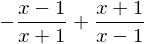

In [155]:
expr

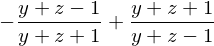

In [157]:
z = Symbol('z')
x = Symbol('x')
expr = (x + 1)/(x-1) - (x-1)/(x+1)


yz_expr = expr.subs({x: a+z})
yz_expr

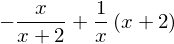

In [159]:
yz_expr.subs({'y': 1, 'z':x})

## Solve ...

In [19]:
sy.solve(x**2-4*x+5)

[2 - ⅈ, 2 + ⅈ]

In [95]:
sy.solve(sy.Abs(x-3)> 2)

(-∞ < x ∧ x < 1) ∨ (5 < x ∧ x < ∞)

## Double pendlum example

In [98]:
from sympy.physics.mechanics import *
# Angle of first and second pendlum as function of the time
q1, q2 = dynamicsymbols('q1 q2')
# Derivatives of the angles
q1d, q2d = dynamicsymbols('q1 q2', 1)
# Angular velocity.
u1, u2 = dynamicsymbols('u1 u2')
# Derivative of angular velocity.
u1d, u2d = dynamicsymbols('u1 u2', 1)

# Symbols for: pendlum length, weight, acceleration of gravity
l, m, g = symbols('l m g')

In [100]:
# Inertial reference frame
N = ReferenceFrame('N')
# Reference frame of the first pendlum.
# Rotate original frame N by angle q1 around axis N.z
A = N.orientnew('A', 'Axis', [q1, N.z])
# Reference frame of the second pendlum
B = N.orientnew('B', 'Axis', [q2, N.z])

# Set angular velocity of the frame. That is vector perpendicular to 
# plane of rotation with size equal to the angular velocity.
A.set_ang_vel(N, u1 * N.z)
B.set_ang_vel(N, u2 * N.z)

In [101]:
# Anchor point of the first pendlum.
O = Point('O')
# Tip of the first pendlum, length 'l'
P = O.locatenew('P', l * A.x)
# Tip of the second pendlum, length 'l'
R = P.locatenew('R', l * B.x)

In [102]:
# No velocity for anchor.
O.set_vel(N, 0)
# Set velocity of point P in reference frame N, from constraint that
# Points P and O have no relative motion in frame A.
P.v2pt_theory(O, N, A)
R.v2pt_theory(P, N, B)

l⋅u₂(t) b_y + l⋅u₁(t) a_y

In [110]:
# Mass point at tips, common mass 'm'.
ParP = Particle('ParP', P, m)
ParR = Particle('ParR', R, m)


ParP

In [162]:
kd = [q1d - u1, q2d - u2]
FL = [(P, m * g * N.x), (R, m * g * N.x)]
BL = [ParP, ParR]

KM = KanesMethod(N, q_ind=[q1, q2], u_ind=[u1, u2], kd_eqs=kd)

(fr, frstar) = KM.kanes_equations(BL, FL)
kdd = KM.kindiffdict()
mm = KM.mass_matrix_full
fo = KM.forcing_full
qudots = mm.inv() * fo
qudots = qudots.subs(kdd)

In [163]:
kdd

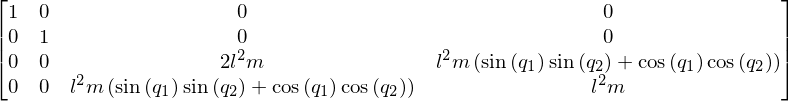

In [113]:
mm

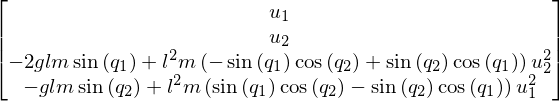

In [160]:
fo

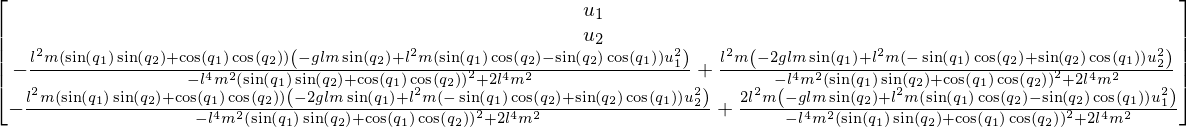

In [164]:
qudots

In [165]:
qudots.simplify()
mechanics_printing()

# Right hand side of the system of nonlinear kinematic equations of first order to solve.
mprint(qudots)

Matrix([
[                                                                                                             u1],
[                                                                                                             u2],
[(g*sin(q1 - 2*q2) + 3*g*sin(q1) + l*u1**2*sin(2*q1 - 2*q2) + 2*l*u2**2*sin(q1 - q2))/(l*(cos(2*q1 - 2*q2) - 3))],
[(-g*sin(2*q1 - q2) + g*sin(q2) - 2*l*u1**2*sin(q1 - q2) - l*u2**2*sin(2*q1 - 2*q2)/2)/(l*(cos(q1 - q2)**2 - 2))]])


In [166]:
# append the following code to your script, or run it in the interpreter after you run your script
co = code_output(KM, "outfile")
co.get_parameters()
# output should be [m, g, l]
co.give_parameters([1, 9.81, 1])
co.get_initialconditions()
# output should be [q1, q2, u1, u2]
co.give_initialconditions([.1, .2, 0, 0])
co.give_time_int([0,10,1000])

co.write_settings_file()
co.write_rhs_file('SciPy')

run(outfile.py)

NameError: name 'code_output' is not defined

## Expression evaluation

In [171]:

x, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)


In [177]:
from timeit import timeit

# Simplest method: using subs
def eval1():
    expr.subs({x: 17, y: 42}).evalf()
    
timeit(eval1, number=10000)

In [180]:
import math 

# Using handmade function
def my_expr(x, y):
    return 3*x**2 + math.log(x**2 + y**2 + 1)

def eval2():
    my_expr(17, 42)
    
timeit(eval2, number=10000)

In [181]:
# Let SymPy to make the function from expression
g = lambdify([x, y], expr, modules=['math'])

def eval3():
    g(17, 42)
    
timeit(eval3, number=10000)    

## Use Scipy to simulate double pendlum

In [188]:
from scipy.integrate import odeint
import numpy as np

$q$ is angle, $u$ is angular velocity

$\dot{q}(t) = u$

$\dot{u}(t) = -mg sin(q)$

In [199]:
# solve simple pendlum
m = 2
g = 10

def force(x, t):
    q,u = x
    return [ u,
             -m*g*math.sin(q)]

dt = 0.05
times = np.arange(0.0, 3, dt)
init = [np.pi/4, 0.0]
sol = scipy.integrate.odeint(force, init, times)


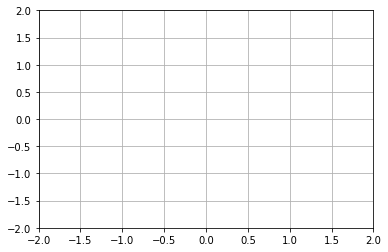

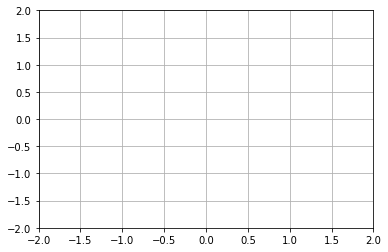

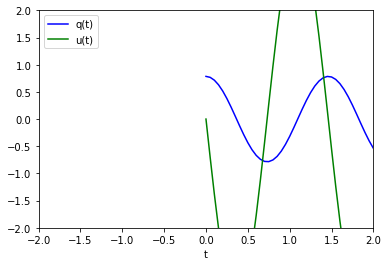

In [200]:
import matplotlib.pyplot as plt
plt.plot(times, sol[:, 0], 'b', label='q(t)')
plt.plot(times, sol[:, 1], 'g', label='u(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [201]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, math.sin(sol[i,0])]
    thisy = [0, math.cos(sol[i,0])]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(sol)),
                              interval=25, blit=True, init_func=init)



anim = animation.FuncAnimation(fig, animate, blit=False, interval=10,
                               init_func=init)

# For embedding into Jupiter notebook.
HTML(ani.to_html5_video())
